# Customer Retention Project

Customer retention refers to the activities and actions companies and organizations take to reduce the number of customer defections. The goal of customer retention programs is to help companies retain as many customers as possible, often through customer loyalty and brand loyalty initiatives. It is important to remember that customer retention begins with the first contact a customer has with a company and continues throughout the entire lifetime of the relationship.

In [175]:
#loading the libraries

#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [176]:
#acquiring the data
customer_retn=pd.read_excel("customer_retention_dataset.xlsx")

In [177]:
#checking the structure of the dataset
print(customer_retn.shape)

(269, 71)


In [178]:
#extracting the general information from the dataset
customer_retn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    int64 
 1   2 How old are you?                                                                                                                                                                    

In [179]:
#dropping the columns which are similar in kind
customer_retn.drop(customer_retn.columns[[1, 3, 6,7,8,9,10,11,20,21,22,25]], axis = 1, inplace = True)

In [180]:
#previewing the data
customer_retn.head(5)

,1Gender of respondent,3 Which city do you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,Delhi,5,4,1,3,4,3,3,4,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,Delhi,5,5,4,5,1,5,5,5,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,Greater Noida,4,5,4,4,4,3,5,5,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,Karnal,4,1,1,3,1,1,2,4,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,Bangalore,3,2,4,5,1,4,2,5,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [181]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

customer_retn["3 Which city do you shop online from?"] = le.fit_transform(customer_retn["3 Which city do you shop online from?"])


column= customer_retn.iloc[:, 35:]
for col in column:
    customer_retn[col] = le.fit_transform(customer_retn[col])
    
#previewing the data
customer_retn.head(5)

,1Gender of respondent,3 Which city do you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,2,5,4,1,3,4,3,3,4,...,0,0,3,5,0,3,2,0,0,6
1,1,2,5,5,4,5,1,5,5,5,...,1,6,7,10,7,5,0,4,1,3
2,1,4,4,5,4,4,4,3,5,5,...,7,6,4,7,0,3,5,6,0,5
3,0,6,4,1,1,3,1,1,2,4,...,9,7,4,8,5,3,1,1,2,1
4,1,0,3,2,4,5,1,4,2,5,...,5,8,5,8,7,3,0,7,6,3


In [182]:
#class distribution of target data
customer_retn.groupby("Which of the Indian online retailer would you recommend to a friend?").size()

Which of the Indian online retailer would you recommend to a friend?
0    79
1    62
2    15
3    30
4    13
5    20
6    39
7    11
dtype: int64

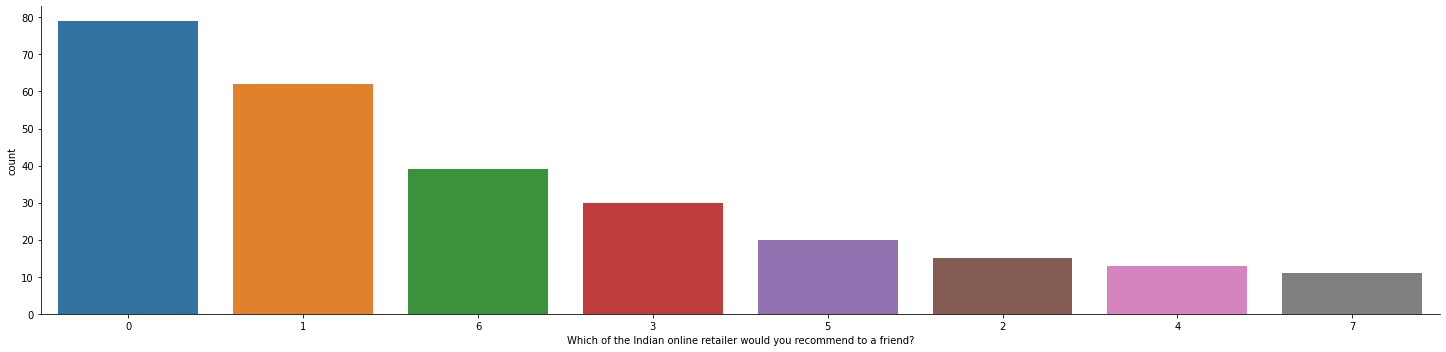

In [183]:
#vizual representation of the class distribution of target data
sns.catplot(x='Which of the Indian online retailer would you recommend to a friend?',kind='count',data=customer_retn,aspect=4,order=customer_retn['Which of the Indian online retailer would you recommend to a friend?'].value_counts().index)

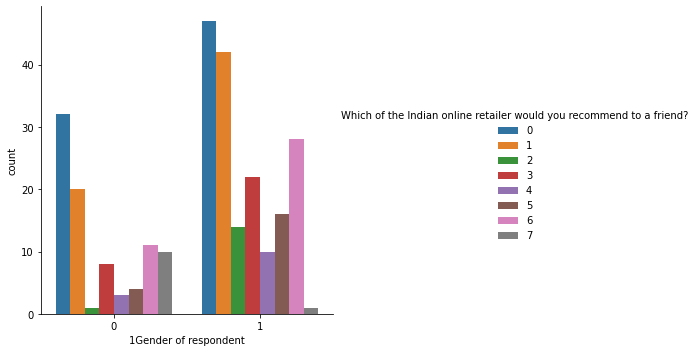

In [184]:
#Recommendation of an e-commerce site based upon gender(0 stands for male recommending a site and 1 stands for 
#female recommending the same)
sns.catplot(x="1Gender of respondent", hue="Which of the Indian online retailer would you recommend to a friend?", 
                 data=customer_retn,kind='count')

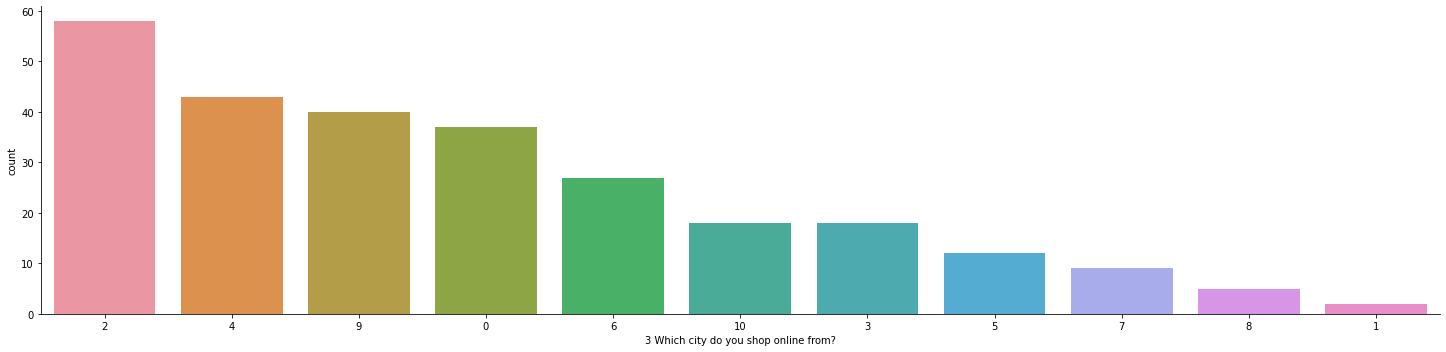

In [185]:
#Visual representation of cities, online orders are being placed from most to least
sns.catplot(x='3 Which city do you shop online from?',kind='count',data=customer_retn,aspect=4,order=customer_retn['3 Which city do you shop online from?'].value_counts().index)

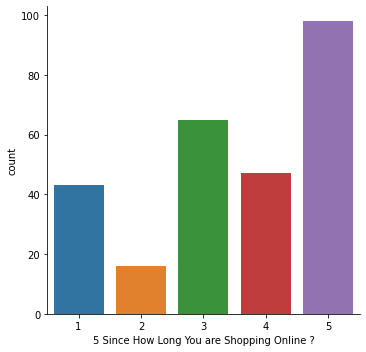

In [186]:
# To get the nature of the customers being constant on online platforms
sns.catplot(x="5 Since How Long You are Shopping Online ?", 
                 data=customer_retn,kind='count')

,1Gender of respondent,3 Which city do you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
1Gender of respondent,1.000000,-0.091867,-0.046005,0.076121,0.104118,0.139327,0.049685,0.090390,-0.024279,0.166977,...,0.097002,0.230735,0.068137,0.002793,0.163248,-0.052701,0.154007,0.260813,-0.047723,-0.002005
3 Which city do you shop online from?,-0.091867,1.000000,0.103714,-0.127906,-0.046907,-0.144474,0.110773,-0.196544,0.023537,0.137650,...,-0.065450,-0.115453,-0.293441,-0.104340,-0.263921,-0.123369,0.000427,0.019167,0.007117,-0.142123
5 Since How Long You are Shopping Online ?,-0.046005,0.103714,1.000000,0.291104,0.051236,0.019561,-0.056492,0.066297,0.045517,-0.037198,...,-0.063932,0.000073,0.048183,0.018714,-0.038376,0.146307,0.102906,-0.043482,-0.176908,0.029584
6 How many times you have made an online purchase in the past 1 year?,0.076121,-0.127906,0.291104,1.000000,0.298446,0.043687,0.168697,0.190797,0.181841,-0.002816,...,-0.010861,-0.023772,0.086206,-0.061695,-0.155042,-0.006841,0.041653,-0.009108,-0.162551,0.159652
"13 After first visit, how do you reach the online retail store?\t\t\t\t",0.104118,-0.046907,0.051236,0.298446,1.000000,0.050510,0.184078,0.378526,0.352202,0.340288,...,-0.018142,0.141791,-0.000068,-0.006572,-0.156596,-0.210610,-0.082074,0.254532,0.056162,0.155481
14 How much time do you explore the e- retail store before making a purchase decision?,0.139327,-0.144474,0.019561,0.043687,0.050510,1.000000,-0.090656,0.399176,0.223680,0.313116,...,0.286426,0.206506,0.308132,0.319885,0.497498,0.499749,0.416012,0.494418,0.061519,0.252640
15 What is your preferred payment Option?\t\t\t\t\t,0.049685,0.110773,-0.056492,0.168697,0.184078,-0.090656,1.000000,0.081316,0.344586,0.158407,...,0.003690,-0.282841,-0.323856,-0.309113,-0.584941,-0.255675,0.356335,-0.159916,-0.366294,0.487653
16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,0.090390,-0.196544,0.066297,0.190797,0.378526,0.399176,0.081316,1.000000,0.170624,0.259559,...,-0.138502,0.075317,0.397071,0.232106,0.244426,0.329687,0.175128,0.482623,0.179074,0.335247
"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",-0.024279,0.023537,0.045517,0.181841,0.352202,0.223680,0.344586,0.170624,1.000000,0.322409,...,-0.119749,-0.090539,-0.047878,0.193534,-0.184851,0.205198,0.145912,0.194210,0.043957,0.426250
18 The content on the website must be easy to read and understand,0.166977,0.137650,-0.037198,-0.002816,0.340288,0.313116,0.158407,0.259559,0.322409,1.000000,...,0.208379,0.389884,-0.074448,0.422217,0.246240,0.240011,0.313872,0.614021,0.215478,0.166009


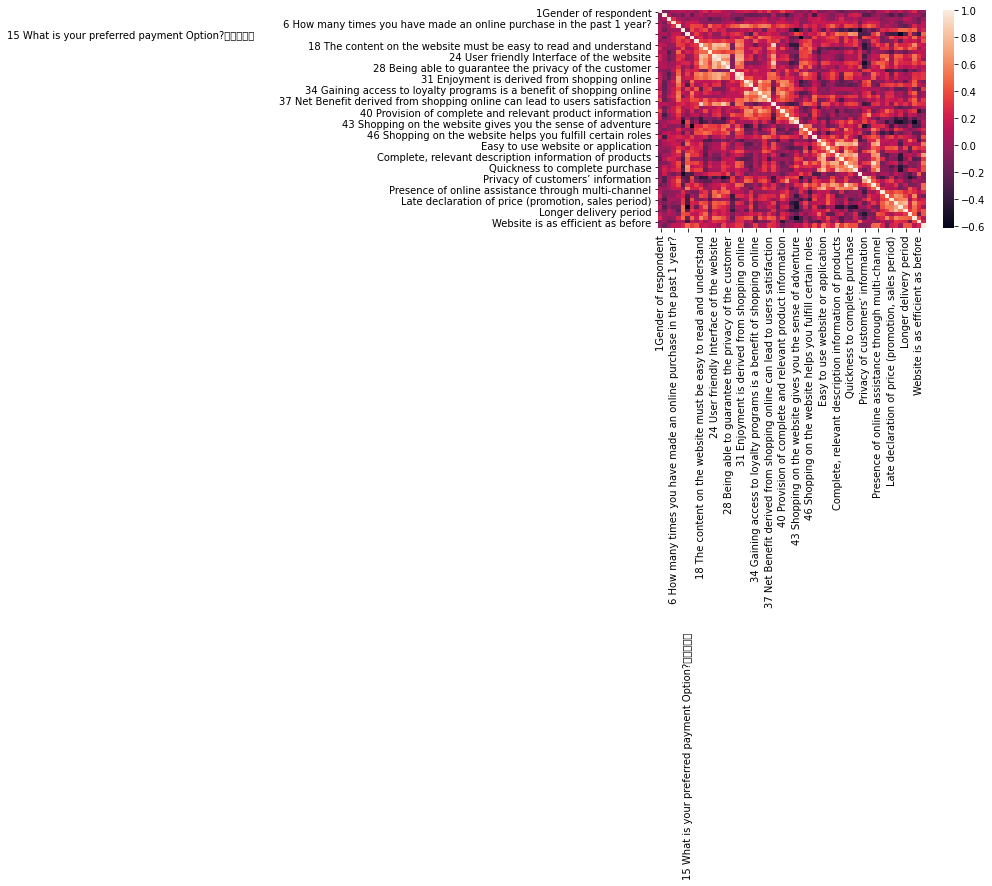

In [187]:
#checking for the correlation(interrelation) of columns with each other
sns.heatmap(customer_retn.corr())
customer_retn.corr()

In [188]:
#checking for the statastical report
customer_retn.describe()

,1Gender of respondent,3 Which city do you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.669145,4.494424,3.524164,2.672862,2.546468,3.921933,1.784387,2.884758,2.684015,4.382900,...,4.044610,4.063197,3.843866,5.988848,3.717472,2.736059,2.189591,3.587361,2.133829,2.397770
std,0.471398,3.187687,1.436586,1.651788,1.264718,1.196014,1.084997,1.028380,1.344060,1.046603,...,3.343218,3.177536,2.103162,2.855321,2.853728,1.725857,2.152169,2.557690,2.171029,2.362991
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000,4.000000,...,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,4.000000,4.000000,2.000000,3.000000,4.000000,1.000000,3.000000,2.000000,5.000000,...,3.000000,4.000000,4.000000,7.000000,3.000000,3.000000,1.000000,4.000000,1.000000,1.000000
75%,1.000000,7.000000,5.000000,4.000000,4.000000,5.000000,2.000000,3.000000,4.000000,5.000000,...,7.000000,7.000000,5.000000,8.000000,7.000000,4.000000,5.000000,6.000000,4.000000,5.000000
max,1.000000,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,...,9.000000,9.000000,7.000000,10.000000,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000


1Gender of respondent                                                                                                                                                                                                     AxesSubplot(0.125,0.840263;0.133621x0.0397368)
3 Which city do you shop online from?                                                                                                                                                                                  AxesSubplot(0.285345,0.840263;0.133621x0.0397368)
5 Since How Long You are Shopping Online ?                                                                                                                                                                              AxesSubplot(0.44569,0.840263;0.133621x0.0397368)
6 How many times you have made an online purchase in the past 1 year?                                                                                                                                        

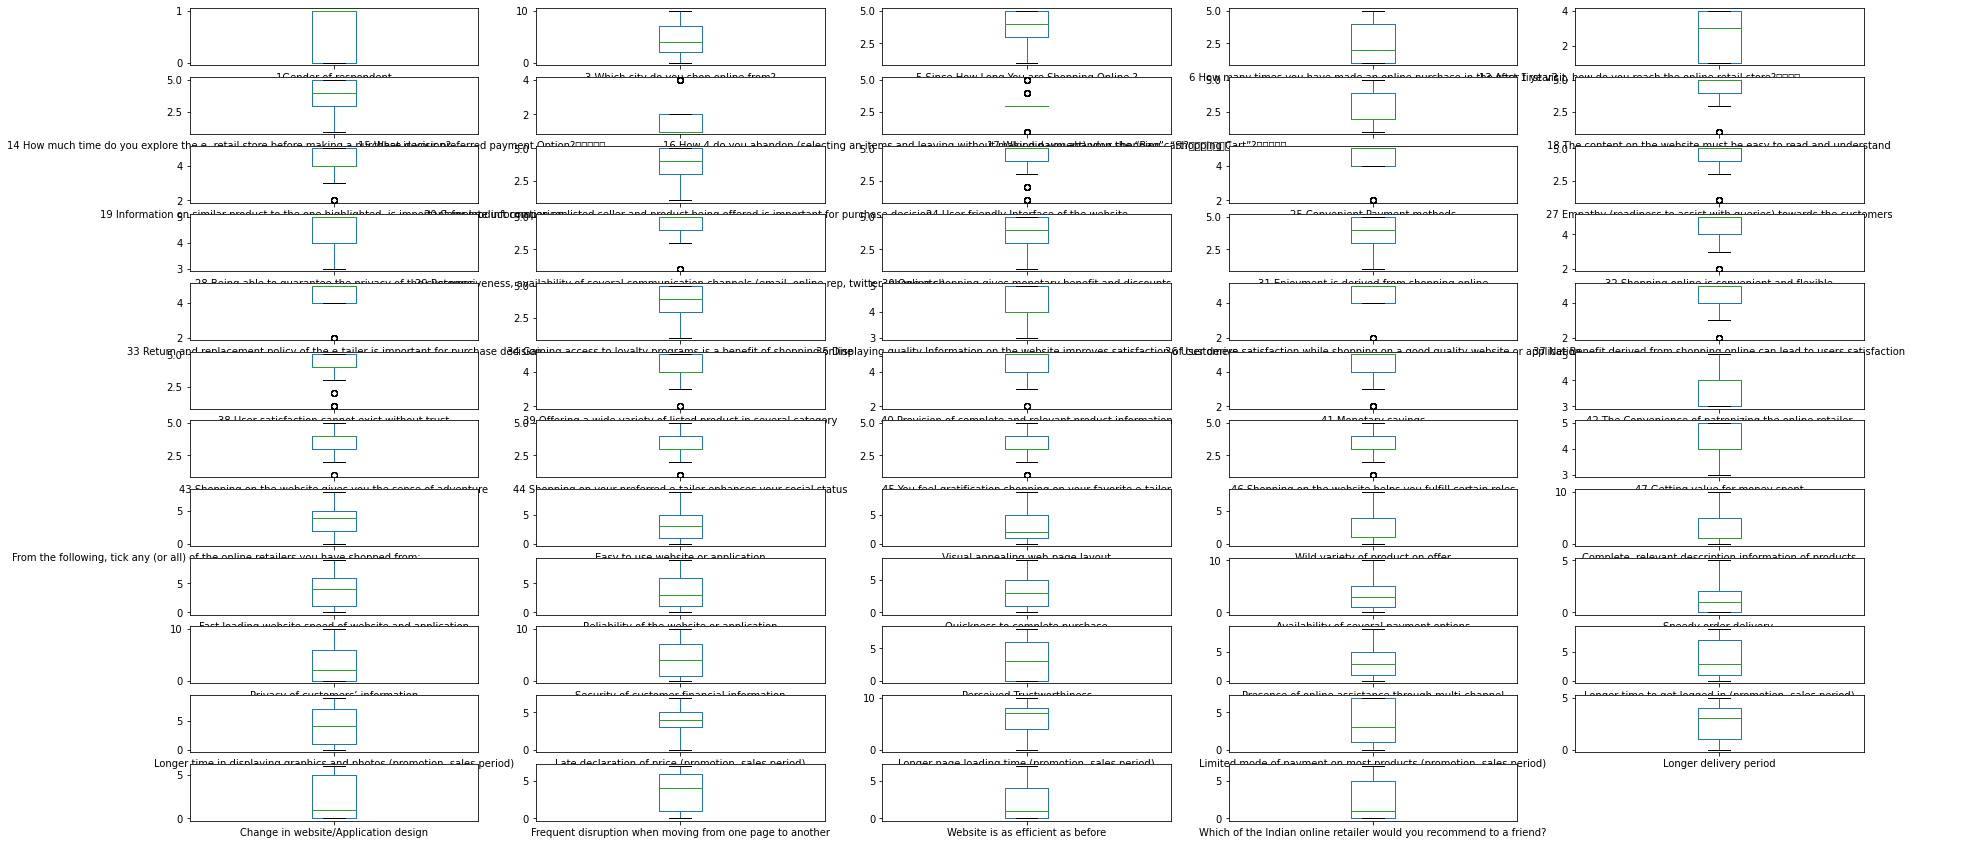

In [189]:
#checking for the outliers
customer_retn.plot(kind='box',subplots=True,layout=(16,5),figsize=(30,20))

In [190]:
#removing outliers
z_score=np.abs(zscore(customer_retn))
print(customer_retn.shape)
customer_retn_final=customer_retn.loc[(z_score<3).all(axis=1)]
print(customer_retn_final.shape)

(269, 59)
(215, 59)


In [204]:
#separating the independent and dependent variables
x=customer_retn.iloc[:, :-1]
y =customer_retn.iloc[:,-1:]

In [207]:
#The most important use of PCA is to represent a multivariate data table as smaller set of variables (summary indices) in order to observe trends, jumps, clusters and outliers.
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(x)
pca_samples = pca.transform(x)

In [209]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,14.883751,9.029534,-4.323335,-0.671339,-4.160321,5.752302
1,3.428747,-6.121247,11.193267,-4.213890,0.637243,-0.206265
2,12.923859,-1.642095,-4.410792,3.605532,0.346543,-3.661024
3,-0.361631,-3.221160,-1.813689,2.189595,4.214044,5.960117
4,6.107019,-8.985150,8.792701,-2.881602,-2.684286,-0.884366


(269, 2)
           0          2
0  14.883751  -4.323335
1   3.428747  11.193267
2  12.923859  -4.410792
3  -0.361631  -1.813689
4   6.107019   8.792701


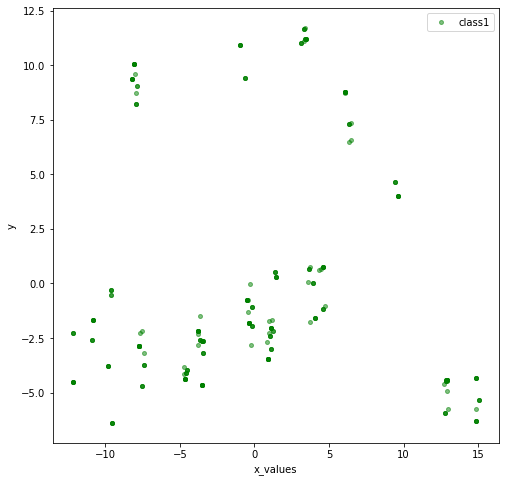

In [237]:
#I have chosen the (PC3,PC1) pair. Since each component is the projection of all the points of the original dataset 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[0,2]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[0], tocluster[2], 'o', markersize=4, color='green', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y')
plt.legend()
plt.show()

In [238]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ 2.28945165 -0.77808413]
 [-0.13707483  9.65372001]
 [13.63483286 -4.9738333 ]
 [-6.80147024 -3.2531446 ]]


In [239]:
print (c_preds[0:100])

[2 1 2 0 1 0 0 1 0 3 0 3 3 3 2 0 1 0 0 0 1 1 0 3 0 3 3 3 2 0 1 2 1 2 0 1 0
 0 1 0 3 0 3 3 2 1 2 0 0 1 0 0 1 1 0 3 0 3 3 2 1 2 0 0 1 1 2 1 2 0 1 3 3 3
 3 3 0 1 2 1 0 0 3 0 3 0 1 0 3 0 3 3 3 3 2 1 0 0 3 3]


In [240]:
#We have found a possible clustering for our customers recomending feature. Let's check if we also manage to find some interesting pattern beneath it.
clust_prod = x.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

,1Gender of respondent,3 Which city do you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,cluster
0,0,2,5,4,1,3,4,3,3,4,...,0,0,3,5,0,3,2,0,0,2
1,1,2,5,5,4,5,1,5,5,5,...,1,6,7,10,7,5,0,4,1,1
2,1,4,4,5,4,4,4,3,5,5,...,7,6,4,7,0,3,5,6,0,2
3,0,6,4,1,1,3,1,1,2,4,...,9,7,4,8,5,3,1,1,2,0
4,1,0,3,2,4,5,1,4,2,5,...,5,8,5,8,7,3,0,7,6,1
5,1,9,5,5,4,5,4,4,2,5,...,6,3,2,2,2,1,5,2,0,0
6,0,2,5,4,3,5,1,3,5,4,...,2,0,4,7,3,5,4,4,7,0
7,0,2,4,1,2,3,1,3,1,1,...,1,1,5,1,1,1,0,0,0,1
8,1,10,3,1,3,2,2,3,4,5,...,0,2,0,4,0,0,0,5,5,0
9,1,2,1,1,1,5,2,3,3,4,...,8,1,5,8,7,5,4,4,4,3


Let's check out what are the top 10 features people rely upon of each cluster.

In [241]:
c0.sort_values(ascending=False)[0:10]

Privacy of customers’ information                                                                             7.630435
Security of customer financial information                                                                    6.260870
Fast loading website speed of website and application                                                         5.543478
41 Monetary savings                                                                                           5.000000
29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)    4.847826
32 Shopping online is convenient and flexible                                                                 4.847826
33 Return and replacement policy of the e-tailer is important for purchase decision                           4.847826
35 Displaying quality Information on the website improves satisfaction of customers                           4.847826
36 User derive satisfaction while shopping on a 

In [242]:
c1.sort_values(ascending=False)[0:10]

Longer page loading time (promotion, sales period)                                                                                                           8.602410
Limited mode of payment on most products (promotion, sales period)                                                                                           6.819277
Longer time in displaying graphics and photos (promotion, sales period)                                                                                      6.445783
Frequent disruption when moving from one page to another                                                                                                     5.771084
Late declaration of price (promotion, sales period)                                                                                                          5.506024
33 Return and replacement policy of the e-tailer is important for purchase decision                                                                          5.000000
24 U

In [243]:
c2.sort_values(ascending=False)[0:10]

Longer time to get logged in (promotion, sales period)                                                                                                             8.078125
Longer page loading time (promotion, sales period)                                                                                                                 7.390625
Longer time in displaying graphics and photos (promotion, sales period)                                                                                            6.093750
Fast loading website speed of website and application                                                                                                              6.015625
Security of customer financial information                                                                                                                         5.906250
From the following, tick any (or all) of the online retailers you have shopped from;                                                        

In [244]:
c3.sort_values(ascending=False)[0:10]

3 Which city do you shop online from?                                                                         6.118421
Availability of several payment options                                                                       4.552632
28 Being able to guarantee the privacy of the customer                                                        4.526316
27 Empathy (readiness to assist with queries) towards the customers                                           4.355263
18 The content on the website must be easy to read and understand                                             4.342105
38 User satisfaction cannot exist without trust                                                               4.342105
36 User derive satisfaction while shopping on a good quality website or application                           4.328947
29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)    4.289474
20 Complete information on listed seller and pro